Link to Github repo: http://localhost:8888/tree/Astron_121/Radio-Astronomy-Lab-Work

### Main Lab Objectives: 
    1. Demonstrate an undersdtanding of Nyquist sampling and aliasing. 
    2. Characterize the bandpass filter of the SDR.
    3. Use and accurately describe power and voltage spectra.
    4. Investigate spectral leakage and frequncy resolution.
    5. Analyze the properties of noise and the radiometer equation.  
    6. Demonstrate the operation of DSB and SSB mixers and explain their importance.  
    7. Accurately present quantitative results in the context of expectations, theory, tests, and diagnostics that  
    demonstrate the correctnesss of the analysis.  
    8. Build an installable Python package, with revision control and unit tests, that supports your report.  
    Provide the link in your report. 

### Report Outline: 
    1. Theoretical Background & Experimental Setup
    2. Observed Data vs. Expected Theory
    3. Verify Noise Generator
    4. Voltage & Power Spectra
    5. Spectral Leakage & Frequency Resolution
    6. Analysis (explore error)


### Working question:  (this should go into theoretical bg later)<br> 
##### How can aliasing be utilized to filter noise and pass through a clean signal where we can understand the information being conveyed?

Main idea from this is take in a noisy signal, alias it down, and then see how less data might give us a clearer signal when noise is added.

### Theoretical Background and Experimental Setup

To determine how aliasing can be utilized to filter noise and pass through a clean, interpretable signal, an intentionally aliased noisy signal can be compared to a clean alised signal with minimal noise. In order to collect data for radio frequencies, an RTL-SDR (Software Defined Radio on Realtek Chipsets) designed for collecting radio and television signals can be used. For the purpose of this experiment, the RTL-SDR was connected to a local radio frequency wave generator and interpreted by a Raspberri Pi (4th gen). Since the RTL-SDR was designed for commerical consumption of media via radio frequencies, there is a low pass filter configured in the device that helps prevent aliasing. Thus, to collect intentionally aliased waves the low pass filter had to be disabled using a Finite Impulse Response filter, or otherwise known as a FIR filter. This filter is applied as weighting coefficients when gathering data using the SDR. These FIR coefficients were applied for the entirety of this experiment. Despite the FIR coefficients allowing a higher possibility of aliasing, if the sample rate is within the Nyquist Criterion for the frequency that is being sampled then no aliasing should occur. Once clean data has been sampled, the SDR can be configured to collect noisy data with an input frequency and a type of mixer to combine the two signals, a clean frequency and a generated noise frequency. The result is a known frequency that has should have a Guassian distribution of noise if the noise is perfectly random. Similar to the previous description, a double side band (DSB) mixer configuration is ideal for this experiment because two frequencies are taken in, radio frequency (RF) and local oscillator (LO), then the two input voltage signals are multiplied and output as the intermediate frequency (IF). Comparitively, a single-side band mixer would allow for less post-process filtering of the data because of the up-converting or down-converting nature of them depending on the construction, but would require a more complex initial setup. Since a double sideband mixer essentially combines the two signals that we need, that is the more direct and practical mixer to use for this case. All data was collected using the Mini-Circuits ZAD-1 Mixer and standard noise and wave generators. Normally this noise would cause most of the information in a wave to be lost or difficult to decypher because there are too many outlier data points that crowd the signal. Thus, if given a frequency, 600 kHz, if a noisy signal is purposefully aliased can that aid in recovering some information because of the lower sampling rate. 

In [2]:
# Importing useful packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Centering all plots for formality. Source linked below. 

In [3]:
# Source - https://stackoverflow.com/a/66493988
# Posted by Jay Patel
# Retrieved 2026-02-05, License - CC BY-SA 4.0

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


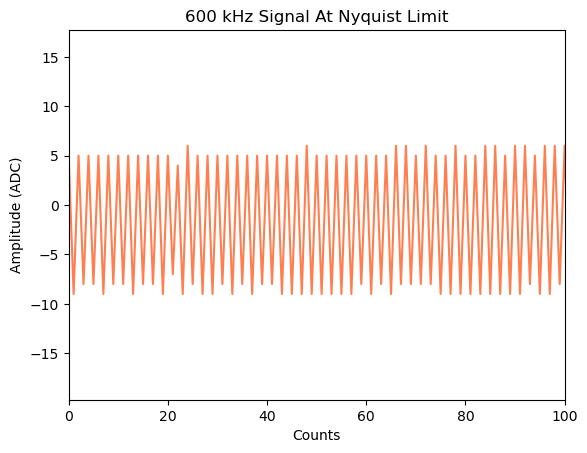

In [4]:
# Checking quality of data initially using my quickplot function in my package

import ziptoplot # custom package 
from ziptoplot import unzip #unzip opens numpy arrays data from .npz files and returns specififed index of data
from ziptoplot import plot #plot has a quick plot function to quickly check if data looks like expected output

plot.quickplot(ziptoplot.unzip.unzip('ny_lim_600khz.npz', 5) , 600, 100, 100, "600 kHz Signal At Nyquist Limit", 'coral')

**Fig. 1** Plot above shows a quick plot of a signal at 600kHz with an input amipltude at 100mV from the generator, which displays at +/- 5 ADC after being digitized. Note the spikey look to the wave. This is because the sample rate is at the boundary of a nyquist zone, meaning data was sampled at a minimum of twice between the crest and troph. Thus, there are not enough data points for the plot to round out. While this does not look particularly sinusoidal, there is sufficient information to observe what frequency was collected.


In order to answer our working question, we recorded three different frequencies with sampling rates below, at, and above their respective Nyquist limits. For this lab, we decided to investigate the behavior of these frequences with the specifices sampling rates around the Niquist Limit found at $f_{signal} \geq 2f_{sample rate}$

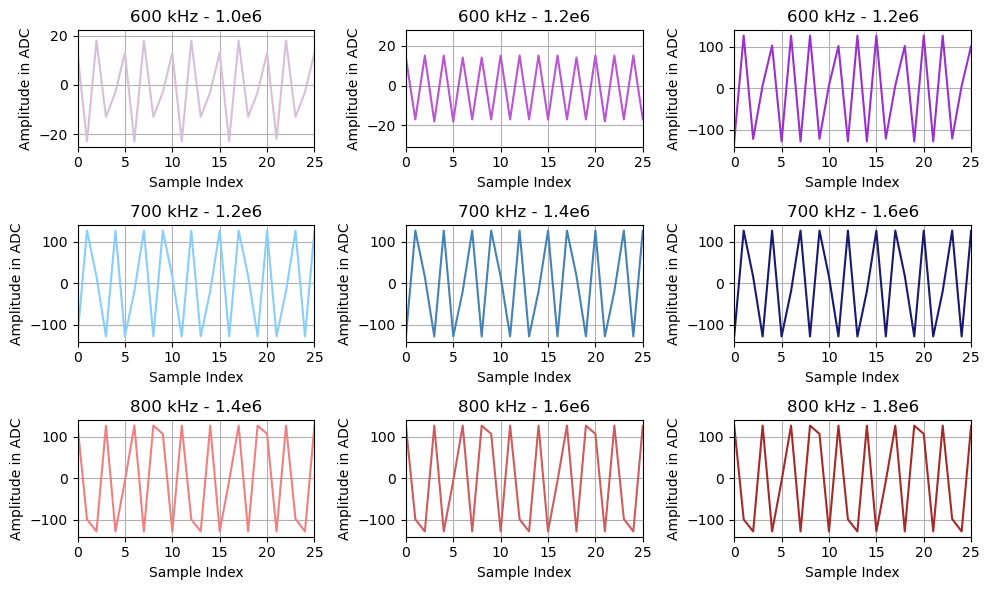

In [44]:
# Checking quality of data initially using my quickplot function in my package

import ziptoplot # custom package 
from ziptoplot import unzip #unzip opens numpy arrays data from .npz files and returns specififed index of data
from ziptoplot import plot #plot has a quick plot function to quickly check if data looks like expected output

# 600 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
belowlim_600 = ziptoplot.unzip.unzip("below_lim_600khz.npz", 5)
# Check data:
# plot.quickplot(belowlim_600 , 600, 100, 100, "600 kHz Signal Below Nyquist Limit", 'darkorchid')
# Data looks good. Same process repeated for the following frequences at differing sample rates. 

#sample rate = 1.2e6
atlim_600 = ziptoplot.unzip.unzip("ny_lim_600khz.npz", 6)
# plot.quickplot(atlim_600 , 600, 100, 100, "600 kHz Signal At Nyquist Limit", 'darkorchid')
# Looks good

#sample rate = 1.4e6
abovelim_600 = ziptoplot.unzip.unzip("above_lim_600khz.npz", 5)
# plot.quickplot(abovelim_600 , 600, 100, 100, "600 kHz Signal Above Nyquist Limit", 'darkorchid')
# Looks good, note it is hitting upper and lower limtis for ADC. Not ideal. 



# 700 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
belowlim_700 = ziptoplot.unzip.unzip("below_lim_700khz.npz", 5)
# plot.quickplot(belowlim_700, 700, 100, 100, "700 kHz Signal Below Nyquist Limit", 'peru')
# Looks good

#sample rate = 1.2e6
atlim_700 = ziptoplot.unzip.unzip("ny_lim_700khz.npz", 5)
# plot.quickplot(atlim_700, 700, 100, 100, "700 kHz Signal At Nyquist Limit", 'peru')
# Looks good

#sample rate = 1.4e6
abovelim_700 = ziptoplot.unzip.unzip("above_lim_700khz.npz", 5)
# plot.quickplot(abovelim_700, 700, 100, 100, "700 kHz Signal Above Nyquist Limit", 'peru')
# Looks good



# 800 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
belowlim_800 = ziptoplot.unzip.unzip("below_lim_800khz.npz", 5)
# plot.quickplot(belowlim_800, 800, 100, 100, "800 kHz Signal Below Nyquist Limit", 'skyblue')
# Looks good

#sample rate = 1.2e6
atlim_800 = ziptoplot.unzip.unzip("above_lim_800khz.npz", 5)
# plot.quickplot(atlim_800, 800, 100, 100, "800 kHz Signal At Nyquist Limit", 'peru')
# Looks good


#sample rate = 1.4e6
abovelim_800 = ziptoplot.unzip.unzip("above_lim_800khz.npz", 5)
# plot.quickplot(abovelim_800, 800, 100, 100, "800 kHz Signal Above Nyquist Limit", 'peru')
# Looks good



# Subplot grid to compare frequencess and sampling rates.
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(10, 6))

# row 1: 600 kHz plots
axes[0, 0].plot(belowlim_600, color='thistle')
axes[0, 0].set_title("600 kHz - 1.0e6")
axes[0, 0].set_xlabel("Sample Index")
axes[0, 0].set_ylabel("Amplitude in ADC")
axes[0, 0].set_xlim(0, 25)
axes[0, 0].grid(True)

axes[0, 1].plot(atlim_600, color='mediumorchid')
axes[0, 1].set_title("600 kHz - 1.2e6")
axes[0, 1].set_xlabel("Sample Index")
axes[0, 1].set_ylabel("Amplitude in ADC")
axes[0, 1].set_xlim(0, 25)
axes[0, 1].grid(True)

axes[0, 2].plot(abovelim_600, color='darkorchid')
axes[0, 2].set_title("600 kHz - 1.2e6")
axes[0, 2].set_xlabel("Sample Index")
axes[0, 2].set_ylabel("Amplitude in ADC")
axes[0, 2].set_xlim(0, 25)
axes[0, 2].grid(True)

# row 2: 700 kHz plots
axes[1, 0].plot(abovelim_700, color='lightskyblue')
axes[1, 0].set_title("700 kHz - 1.2e6")
axes[1, 0].set_xlabel("Sample Index")
axes[1, 0].set_ylabel("Amplitude in ADC")
axes[1, 0].set_xlim(0, 25)
axes[1, 0].grid(True)

axes[1, 1].plot(abovelim_700, color='steelblue')
axes[1, 1].set_title("700 kHz - 1.4e6")
axes[1, 1].set_xlabel("Sample Index")
axes[1, 1].set_ylabel("Amplitude in ADC")
axes[1, 1].set_xlim(0, 25)
axes[1, 1].grid(True)

axes[1, 2].plot(abovelim_700, color='midnightblue')
axes[1, 2].set_title("700 kHz - 1.6e6")
axes[1, 2].set_xlabel("Sample Index")
axes[1, 2].set_ylabel("Amplitude in ADC")
axes[1, 2].set_xlim(0, 25)
axes[1, 2].grid(True)

# row 2: 800 kHz plots
axes[2, 0].plot(abovelim_800, color='lightcoral')
axes[2, 0].set_title("800 kHz - 1.4e6")
axes[2, 0].set_xlabel("Sample Index")
axes[2, 0].set_ylabel("Amplitude in ADC")
axes[2, 0].set_xlim(0, 25)
axes[2, 0].grid(True)

axes[2, 1].plot(abovelim_800, color='indianred')
axes[2, 1].set_title("800 kHz - 1.6e6")
axes[2, 1].set_xlabel("Sample Index")
axes[2, 1].set_ylabel("Amplitude in ADC")
axes[2, 1].set_xlim(0, 25)
axes[2, 1].grid(True)

axes[2, 2].plot(abovelim_800, color='brown')
axes[2, 2].set_title("800 kHz - 1.8e6")
axes[2, 2].set_xlabel("Sample Index")
axes[2, 2].set_ylabel("Amplitude in ADC")
axes[2, 2].set_xlim(0, 25)
axes[2, 2].grid(True)



plt.tight_layout()
plt.show() 

**Fig 2** The array of plot above demonstrate the data collected below, at, and above the Nyquist Citerion from the left to the right. Notice that the 700 kHz and 800 kHz plots all surpass roughly ±127 ADC. The experimental setup has a maximum of ±127-128 ADC  Only comparing 600 kHz to the expected sin waves because it looks the most accurate from the above plots. Check that you are using the correct data. While the ampliudes differ, that is one of the only ones that is not being cut off, which is why I trust it more. 

In [6]:
# Calculate expected aliased frequency
from ziptoplot import caf

sampling_rate = 1000000 # Hz
frequency = 600000 # Hz
k = 1 # first nyquist zone

print(ziptoplot.caf.calcaf(600000, 1000000, 1))
# f_alias =  (sampling_rate - k * frequency)


Expected Aliased Frequency: 400000


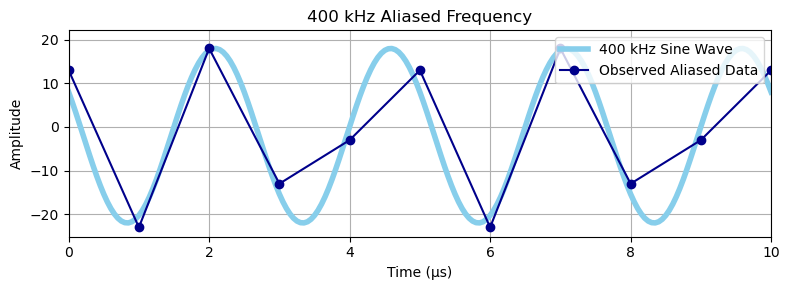

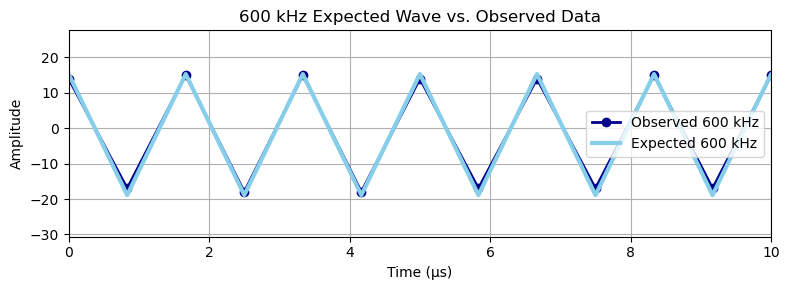

In [88]:
# Plotting Observed vs. Expected Sine Waves


# Expected output of clean but aliased 600 kHz
# Parameters
frequency = 400e3       # expected based off calculation for aliased frequency above
amplitude = 20          # ±20
sampling_rate = 20e6    # 20 MHz sampling rate for smooth plot
duration = 10e-6         # 10 microseconds (enough to see a few cycles)

# Time vector
t = np.arange(0, duration, 1/sampling_rate)

# Sine wave generation
y_aliased = amplitude * np.sin(2 * np.pi * frequency * t + (5*np.pi)/6) - 2


# 600 kHz Data

# Expected output of 600 kHz clean and not aliased
# Clean, normal600 kHz
# Parameters
frequency_atlim = 600e3       # expected based off calculations above
amplitude_atlim = 50          # ±20
sampling_rate_atlim = 1.2e6    # 20 MHz sampling rate for smooth plot
duration_atlim = 10e-6         # 10 microseconds (enough to see a few cycles)

# Time vector
Fs_obs = 1.2e6
N = len(atlim_600)
t_obs = np.arange(N) / Fs_obs

# Sine wave generation
y_atlim = amplitude_atlim * np.sin(2 * np.pi * frequency_atlim * t_obs + 8*np.pi/9) - 1.8



# Plot 400 kHz - aliased frequency
plt.figure(figsize=(8, 3))
plt.plot(t * 1e6, y_aliased, 'skyblue', linewidth = 4, label=f'{frequency/1e3:.0f} kHz Sine Wave') # expected aliased frequency
plt.plot(belowlim_600, 'darkblue', label='Observed Aliased Data', marker='o') 
plt.xlim(0,10)
plt.title('400 kHz Aliased Frequency')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot 600 kHz observed vs. expected frequency
plt.figure(figsize=(8, 3))
plt.plot(t_obs * 1e6, atlim_600, 'darkblue', linewidth=2, label="Observed 600 kHz", marker='o')
plt.plot(t_obs * 1e6, y_atlim, 'skyblue', linewidth=3, label="Expected 600 kHz")
plt.xlim(0, 10)
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("600 kHz Expected Wave vs. Observed Data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Looking into fft shifting data and see if that does anything to these. If you have time. 

**Fig. 3** The top graph displays an ideal 400 kHz sine wave with the observed alised data that is expected to be at 400 kHz based on the Nyquist Critereon. Note there is a slight phase difference which is why all of the dots, indicating where samples were taken, are slightly misaligned. Notice the sine wave apppears jagged because the graphing software only draws straight lines between the dots and does not complete the sinusoid. The bottom graph has a similar pointed appearance, but the light blue is a constructed sine wave at 600 kHz overlayed on the observed data collected at 600 kHz. These two nearly perfectly align, confirming that both the aliased data and the expected data are accurate. 

### Generating Noisy Signals Using A DSB Mixer 

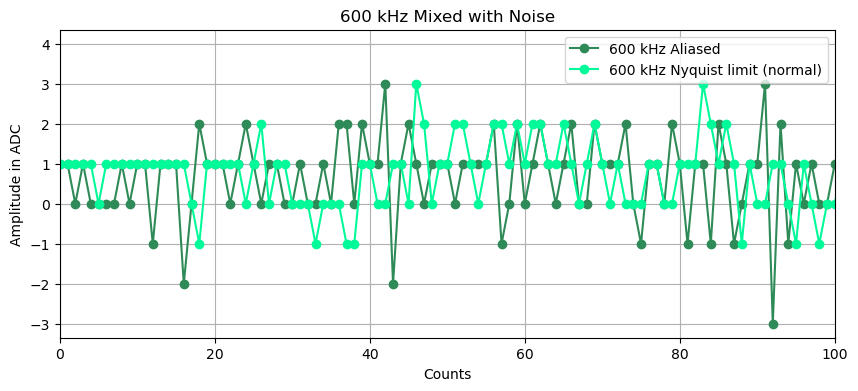

In [7]:
# With Noise (noise generator at level 5)
# Signal frequency = 600 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.4e6
Nbelow_lim_600khz = ziptoplot.unzip.unzip("Nbelow_lim_600khz.npz", 5)

# At Nyquist limit = 1.6e6
Nny_lim_600khz = ziptoplot.unzip.unzip("Nny_lim_600khz.npz", 5)

# Plotting all three together
plt.figure(figsize=(10,4))
plt.plot(Nbelow_lim_600khz, 'seagreen', marker="o", label='600 kHz Aliased') #blue, aliased
plt.plot(Nny_lim_600khz, 'mediumspringgreen', marker="o", label='600 kHz Nyquist limit (normal)') #orange, at limit


# Labeling
plt.title('600 kHz Mixed with Noise')
plt.xlabel('Counts')
plt.ylabel('Amplitude in ADC')
plt.legend()
plt.grid(True)
plt.xlim(0,100)
plt.show()

Fig. 4 

RMS voltage = 2.358


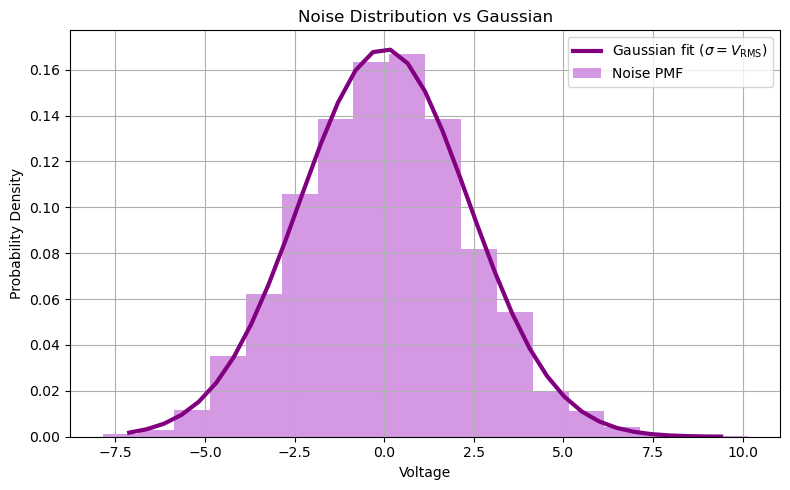

In [4]:
# Gaussian fit 

from scipy.stats import norm

# Noisy data collected, mixed with 600 kHz
Nny_lim_600 = np.load('Nny_lim_600khz.npz')
N_ny_lim_600 = Nny_lim_600['arr_0']

noise = (
#     N_ny_lim_600[0] + # first one is stale, makes the gaussian poke out
    N_ny_lim_600[1] +
    N_ny_lim_600[2] +
    N_ny_lim_600[3] +
    N_ny_lim_600[4] +
    N_ny_lim_600[5] +
    N_ny_lim_600[6] +
    N_ny_lim_600[7] +
    N_ny_lim_600[8] +
    N_ny_lim_600[9]
)

# Remove DC offset
noise = noise - np.mean(noise)

# RMS voltage
Vrms = np.sqrt(np.mean(noise**2))

print(f"RMS voltage = {Vrms:.3f}")

# Gaussian using RMS as sigma
mu = 0.0
sigma = Vrms

# Histogram
num_bins = 35
hist, bin_edges = np.histogram(noise, bins=num_bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Gaussian
gaussian_pdf = norm.pdf(bin_centers, mu, sigma)
values, counts = np.unique(noise, return_counts=True)
pmf = counts / counts.sum()


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, gaussian_pdf, 'purple', linewidth=3,
         label=r'Gaussian fit ($\sigma = V_\mathrm{RMS}$)')
plt.bar(values, pmf, width=1, alpha=0.6, color='mediumorchid', label="Noise PMF")
plt.xlabel("Voltage")
plt.ylabel("Probability Density")
plt.title("Noise Distribution vs Gaussian")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# Radiometer equation: https://casper.astro.berkeley.edu/astrobaki/index.php/Radiometer_Equation

# For analyzing the noise, use numpy.histogram to plot the data 
# Overplot a theoretical Guassian with width equal to the rms voltage 

In [ ]:
# testing the observed vs. expected sin wave for 700 kHz






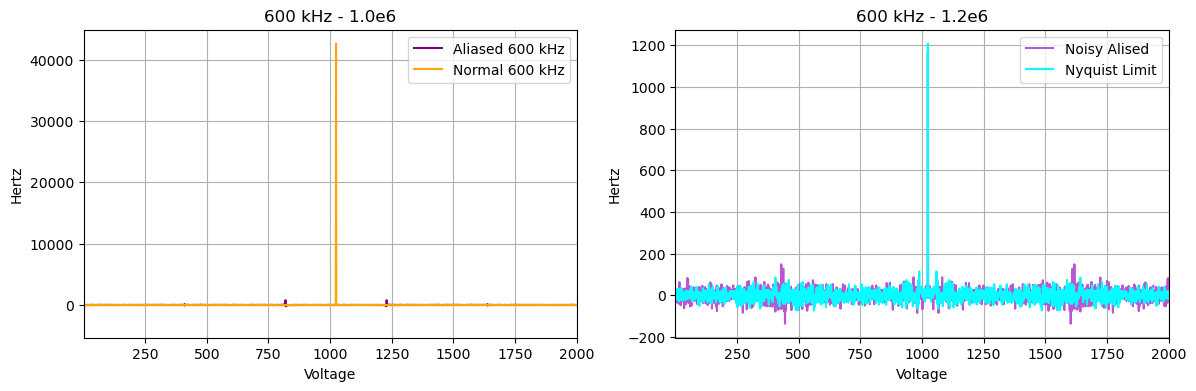

In [89]:
# Voltage spectra - Fourier Transoforms of  

# Still need to figure out the units for each of the aixs. but these are good

Nbelowlim_600 = ziptoplot.unzip.unzip('Nbelow_lim_600khz.npz', 5)

Natlim_600 = ziptoplot.unzip.unzip('Nny_lim_600khz.npz', 5)


# Fourier Transforms
ft_belowlim_600 = np.fft.fft(belowlim_600)
ft_atlim_600 = np.fft.fft(atlim_600)

ft_Nbelowlim_600 = np.fft.fft(Nbelowlim_600)
ft_Natlim_600 = np.fft.fft(Natlim_600)

# Shifting Fourier Transforms
# shifted_ft_belowlim_600 = 
# shifted_ft_atlim_600 = 

shifted_ft_Nbelowlim_600 = np.fft.fftshift(ft_Nbelowlim_600)
shifted_ft_Natlim_600 = np.fft.fftshift(ft_Natlim_600)

# Plotting 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 4))

# Clean, 600 kHz normal
axes[0].plot(ft_belowlim_600, label='Aliased 600 kHz', color='purple')
axes[0].plot(ft_atlim_600, label='Normal 600 kHz', color='orange') # 600 kHz Aliased 
axes[0].set_title("600 kHz - 1.0e6")
axes[0].set_xlabel('Voltage')
axes[0].set_ylabel('Hertz')
axes[0].set_xlim(1, 2000)
axes[0].grid(True)
axes[0].legend()

# 600 kHz Noisy
axes[1].plot(shifted_ft_Nbelowlim_600, label='Noisy Alised', color='mediumorchid') # aliased 
axes[1].plot(shifted_ft_Natlim_600, label='Nyquist Limit', color='cyan') 
axes[1].set_xlabel('Voltage')
axes[1].set_ylabel('Hertz')
axes[1].set_title("600 kHz - 1.2e6")
axes[1].set_xlim(1, 2000)
axes[1].grid(True)
axes[1].legend()

# plt.legend()
plt.grid(True)
plt.show()


# make this log scale for spectral leakage
# check that you shifted it correctly, 

consider the voltage spectrum. what do the real and imaginary parts represent? how are negative frequencies realized? explore these concepts in your report. 

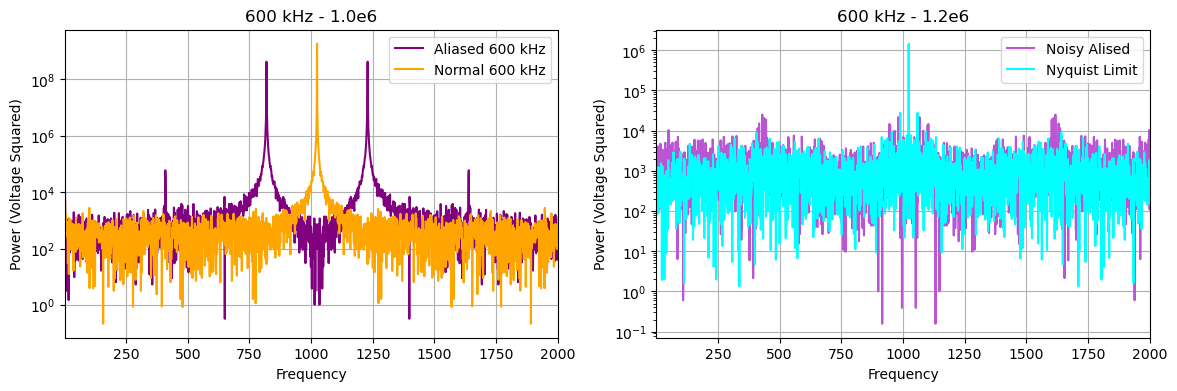

In [92]:
# Power Spectra 
# These don't quite look correct? 

# Calculating Power = | Voltage | ^ 2
pwr_belowlim_600 = np.abs(ft_belowlim_600) ** 2
pwr_atlim_600 = np.abs(ft_atlim_600) ** 2


pwr_Nbelowlim_600 = np.abs(shifted_ft_Nbelowlim_600) ** 2
pwr_Natlim_600 = np.abs(shifted_ft_Natlim_600) ** 2


# Plotting Power Spectra
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 4))

# Clean, 600 kHz normal
axes[0].plot(pwr_belowlim_600, label='Aliased 600 kHz', color='purple')
axes[0].plot(pwr_atlim_600, label='Normal 600 kHz', color='orange') # 600 kHz Aliased 
axes[0].set_title("600 kHz - 1.0e6")
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Power (Voltage Squared)')
axes[0].set_xlim(1, 2000)
axes[0].set_yscale("log")
axes[0].grid(True)
axes[0].legend()

# 600 kHz Noisy
axes[1].plot(pwr_Nbelowlim_600, label='Noisy Alised', color='mediumorchid') # aliased 
axes[1].plot(pwr_Natlim_600, label='Nyquist Limit', color='cyan') 
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Power (Voltage Squared)')
axes[1].set_title("600 kHz - 1.2e6")
axes[1].set_xlim(1, 2000)
axes[1].set_yscale("log")
axes[1].grid(True)
axes[1].legend()

# plt.legend()
plt.grid(True)
plt.show()

**Fig. #??** Above are two graphs displaying how aliased versus non-aliased 600 kHz is represented with and without noise. The graph on the left displays multiple clear peaks at about 400, 800, 1000, 1200, and 1600 $V^{2}$, whereas the graph on the right only displays one very clear peak at 1000 

to get rid of all the noise you're seeing in the power spectra above, convolve FT(power function) and FT(top hat) 
np.convolve
data needs to be shifted in order to have graphs centered on zero
spectral leakage happens when data is not perfectly periodic, but will always happen regardless
look into what you need to use dft's for in this lab. he's mentioned it a few times but I'm not entire sure what its for again

#### Spectral Leakage and Frequency Resolution 
See page 3, sectio 1.2.2 of fourierc to explain spectral leakage

Spectral leakage is bound to happen no matter what, but this is also in part because there are finite bounds to the data (the whole top-hat and convolve stuff gives sinc function). Having finite data limits frequency resolution, because we are only sampling the frequency for a fixed amount of time. The longer the exposure the more accurate the frequency resolution becomes. Spectral resolution is $ \Delta \nu \sim \frac{1}{T} $ where T is the time interval for the exposure. 

To reduce spectral leakage, can multiply the Hanning weighting function to the discretely sampled data before Fourier transforming it, which essentially smooths out the sharp edges of the top hat function which is the cause for spectral leakage. Thus, by smoothing it out the leakage is reduced but ultimately the frequency resolution is reduced because the amount of time that you are observing the wave, or your top hat function is at unity, is decreased. Decrease in resolution is about a factor of two. 

#### Resources and References

